# Clasificación del rango de edad segun el tweet

## Métodos utilizados
Para la realización de la prueba se realizaron dos métodos y criterios diferentes para la extracción de caracteristicas y se probaron varios tipos de clasificadores para cada uno de los métodos.
El primer método usado es el "1. Diccionario de Palabras". y el segundo "2. Caracteristicas propias del tweet".
A continuación se expondrá el codigo para extraer la Data del formato .JSON y su separación en Training Data y Test Data.
Posteriormente se expondrá el codigo de cada uno de los métodos, junto con su explicación y sus resultados.

### Declaración de librerias usadas y extracción de la Data del archivo .JSON

In [1]:
#declaración librerias
import json
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import textfeatures

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Codigo para importar la  data de archivo json y guardarla en listas

- Se guardan los tweets en la lista "tweets"
- Se guardan las edades en la lista "age"
- (La edad almacenada en "age" en cada posición de la lista corresponde al tweet en la misma posición)

In [2]:
#Creando las listas a usar
tweets=[]
age=[]
# Abriendo archivo JSON
f = open('clasificador.json',)
# Retorna el objeto JSON como diccionario
data = json.load(f)  
# Ciclo que guarda los tweets en la lista "tweets" y los rangos de edades en "age"
for i in range(0,len(data['text'])):
#for i in range(0,500):
    tweets.append(data['text'][str(i)])
    age.append(data['age_range'][str(i)])
# Cierra el archivo
f.close()
print(len(data['text']))

30000


In [3]:
#imprimiendo un tweet al lado de su rango de edad
numero_consulta = 29000
print("[",tweets[numero_consulta],"]","Rango edad: ", age[numero_consulta])
print(len(tweets))

[ Me estás llegando al pinchoooooo poco a poco. ] Rango edad:  18-24
30000


### Separación de la Data  en datos de entrenamiento (Training Data) y datos de test (Testing Data)

In [4]:
from sklearn.model_selection import train_test_split
train_text,test_text,train_labels,test_labels =train_test_split(tweets,age,stratify=age)
print(len(train_text),len(test_text))

22500 7500


# 1. Método Diccionario de palabras
El método mostrado a continuación consiste en extraer toda la Data de los tweets y realizar un banco de palabras (sin repetir ninguna). Esto con el fin de comparar cada tweet con el banco de palabras e insertar un '1' en aquellas posiciones donde la palabra del tweet se encuentre en el diccionario y un '0' donde no se encuentre.

Para lograr lo dicho anteriormente, se inicia con el proceso de tokenización el cual consiste en separar el tweet en tokens donde un token es cada palabra del tweet

### proceso de tokenización
- Se crea la funcion "tokenize" la cual recibe como parametro una oración y retorna los Token, a su vez se eliminan palabras comunes como 'a', 'de', 'la', 'y', 'el', 'o', 'que'. ya que no aportan información relevante en la determinación del tipo de tweet, ya que cualquier persona en cualquier rango de edad podría usarlas
- (Un Token es cada una de las palabras del tweet).

In [5]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens=[]
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            word= "".join(new_token)
            if word != "a" and word != "de" and word != "la" and word!="y" and word!="el" and word!="o" and word!="que":
                tokens.append(word)
    return tokens  


- Se crea la lista "tweet_in_token" la cual contiene todos los tweets de la data en tokens

In [6]:
# Se crea la lista "tweet_in_token" la cual contiene todos los tweets de la data en tokens
tweet_in_token=[]
for i in range(0,len(tweets)):    
    token=tokenize(tweets[i])
    tweet_in_token.append(token)


In [7]:
# debug de prueba para visualizar el tweet en tokens y el tweet
print(tweet_in_token[25])
print(tweets[25])

['jorgebarajasjr', 'no', 'estoy', 'diciendo', 'no', 'pero', 'también', 'cae', 'gente', 'lastimosamente', 'no', 'tiene', 'papeles', 'al', 'día', 'no', 'significa', 'sea', 'ladrón', 'asesino', 'simplemente', 'no', 'tienen', 'posibilidad', '💴', 'sacarlos']
@JorgeBarajasJr No estoy diciendo que no, pero también cae gente que lastimosamente no tiene papeles al día y no significa que sea ladrón o asesino... simplemente que no tienen la posibilidad 💴 de sacarlos.


###  Modelos de clasificación  y separación de la data en "Train" y "Test"

- Código para separar la Data en datos de entrenamiento y datos de testeo

In [8]:
from sklearn.model_selection import train_test_split
train_text,test_text,train_labels,test_labels =train_test_split(tweets,age,stratify=age)
print(len(train_text),len(test_text))

22500 7500


- Código para transoformar los datos en '1' o '0', es decir se realizará la comparación entre los tweets y la bolsa de palabras la cual contiene el total de palabras de todos los tweets, en los lugares donde encuentre la palabra pondra un 1 de lo contrario pondra un 0
- Se puede observar que el tamaño de Train_X corresponde a (número de tweets, número de caracteristicas)

In [9]:
demo_vectorizer = CountVectorizer(tokenizer=tokenize,binary=True)
train_X = demo_vectorizer.fit_transform(train_text)
test_X = demo_vectorizer.transform(test_text)

train_X.shape

(22500, 56739)


### Se presentan los modelos de clasificación utlizados

Se pone en prueba el primero modelo "Maquinas de soporte vectorial" y se obtienen sus métricas de desempeño

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

classifier = LinearSVC(max_iter=8000)
classifier.fit(train_X,train_labels)
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
precision=precision_score(test_labels,predicciones,average='weighted')
recall = recall_score(test_labels,predicciones,average='weighted')

#print(predicciones)
print("Accuracy: ", accuracy*100,"%")


Accuracy:  39.6 %


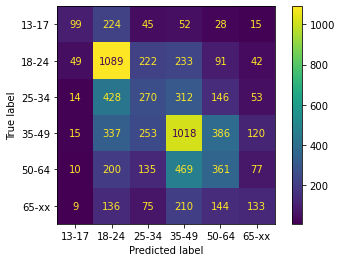

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,test_X, test_labels)
plt.show()

Se pone en prueba el segundo modelo con redes neuronales y se obtienen sus métricas de desempeño

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(6,3), random_state=1,max_iter=6000)
clf.fit(train_X, train_labels)
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
#print(predicciones)
print("Accuracy: ", accuracy*100,"%")

Accuracy:  31.759999999999998 %


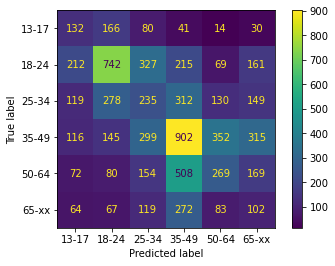

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

- Se prueba el modelo de regresion Logistica

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=3000,multi_class='multinomial').fit(train_X, train_labels)
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
precision=precision_score(test_labels,predicciones,average='weighted')
recall = recall_score(test_labels,predicciones,average='weighted')

#print(predicciones)
print("Accuracy: ", accuracy*100)
print("precision: ", precision*100)
print("Recall: ", recall*100)



Accuracy:  41.21333333333334
precision:  40.94119569534262
Recall:  41.21333333333334


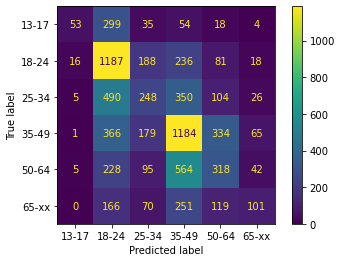

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

- Se prueba el modelo de Multinomial Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)
clf.fit(train_X, train_labels)
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
precision=precision_score(test_labels,predicciones,average='weighted')
recall = recall_score(test_labels,predicciones,average='weighted')

#print(predicciones)
print("Accuracy: ", accuracy*100)
print("precision: ", precision*100)
print("Recall: ", recall*100)


Accuracy:  42.25333333333333
precision:  41.48190987599047
Recall:  42.25333333333333


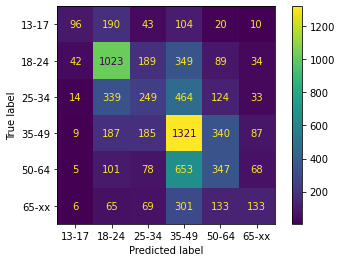

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X, train_labels)
predicciones=clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)

#print(predicciones)
print("Accuracy: ", accuracy*100)

Accuracy:  39.306666666666665


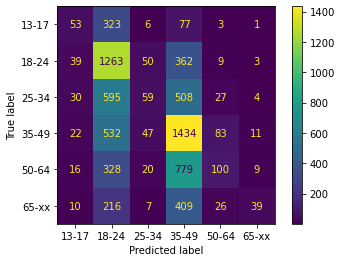

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

# 2. Método caracteristicas propias del tweet

Este método consiste en extraer las variables propias del tweet como la cantidad de emojis, número de caracteres numéricos, número de etiquetas a personas, número de hashtag usados, número de palabras... entre otras.

A continuación se encuentran las funciones para extraer las caracteristicas de los tweet.

In [20]:
import string
import emoji


punctuation = set(string.punctuation)
import emoji

def extract_emojis(s):    
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

def tokenize(sentence):
    tokens=[]
    for token in sentence.split():
        new_token = []
        for character in token:
            #if character not in punctuation:
            new_token.append(character.lower())
        if new_token:
            word= "".join(new_token)
            if word != "a" and word != "de" and word != "la" and word!="y" and word!="el" and word!="o" and word!="que":
                tokens.append(word)
    return tokens       
def numero_de_caracteres(sentence):
    longitud_tweet=len(sentence)
    return longitud_tweet
def numero_emojis(sentence):
    emoj= extract_emojis(sentence)
    num_emojis=len(emoj)
    if len(sentence) != 0:
        return num_emojis/len(sentence)
    else:
        return 0
def numero_etiquetas(sentence):
    numetiquetas=0
    token_tweet = tokenize(sentence)
    for i in token_tweet:
        if '@' in i[0]:
            numetiquetas +=1
    if len(sentence) != 0:
        return numetiquetas/len(sentence)
    else:
        return 0
     
def numero_hashtag(sentence):
    numetiquetas=0
    token_tweet = tokenize(sentence)
    for i in token_tweet:
        if '#' in i[0]:
            numetiquetas +=1
    if len(sentence) != 0:
        return numetiquetas/len(sentence)
    else:
        return 0
    
def numero_palabras(sentence):
    token_tweet = tokenize(sentence)
    return(len(token_tweet))
def promedio_longitud_palabras(sentence):  
    longitud_pal = 0
    token_tweet = tokenize(sentence)
    for i in token_tweet:
        longitud_pal = longitud_pal + len(i)
    num_pal = numero_palabras(sentence)
    if (num_pal!=0):
        prom = longitud_pal / num_pal
        return round(prom,2)
    else:
        return 0
    
        
        
def links(sentence):
    token_tweet= tokenize(sentence)
    for i in token_tweet:
        if 'http' in i:
            return 1
        else:
            return 0
    
def extraccion_caracteristicas(sentence):
    sentence_caracteristicas =[]
    #sentence_caracteristicas.append(numero_de_caracteres(sentence))
    sentence_caracteristicas.append(numero_emojis(sentence))
    sentence_caracteristicas.append(numero_etiquetas(sentence))
    sentence_caracteristicas.append(numero_palabras(sentence))
    #sentence_caracteristicas.append(links(sentence))  
    sentence_caracteristicas.append(promedio_longitud_palabras(sentence))     
    return sentence_caracteristicas



s=5
carac=extraccion_caracteristicas(tweets[s])
print(tweets[s])
print(carac)

@LaNegra_Redd Bueno no se arranca perdiendo 🙄🙄🤭😅
[0.08333333333333333, 0.020833333333333332, 7, 6.0]


Código para extraer armar la matriz de caracteristicas

In [21]:
def matriz_de_caracteristicas(tweets):
    mat_caracteristicas =[]
    for i in tweets:
        carac = extraccion_caracteristicas(i)
        mat_caracteristicas.append(carac)
    return mat_caracteristicas

train_X=matriz_de_caracteristicas(train_text)#print(train_X)    
test_X=matriz_de_caracteristicas(test_text)

Modelo de SVM Maquinas de soporte Vectorial

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

classifier = LinearSVC(max_iter=16000)
classifier.fit(train_X,train_labels)
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
#print(predicciones)
print("Accuracy: ", accuracy*100,"%")

Accuracy:  33.29333333333334 %


C:\Users\juanda\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\juanda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


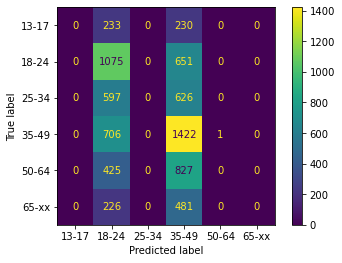

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,test_X, test_labels)
plt.show()

Se muestra el model de redes neuronales

In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(6,3), random_state=1,max_iter=6000)
clf.fit(train_X, train_labels)
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
#print(predicciones)
print("Accuracy: ", accuracy*100,"%")

Accuracy:  28.386666666666667 %


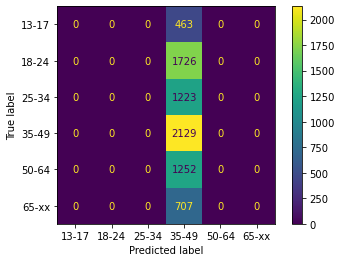

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

Se muestra el Modelo de Regresión Logistica

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=3000,multi_class='multinomial').fit(train_X, train_labels)
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)

#print(predicciones)
print("Accuracy: ", accuracy*100)

Accuracy:  33.70666666666667


C:\Users\juanda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


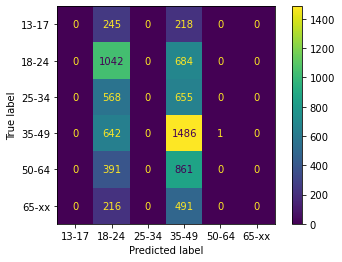

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

Se muestra el modelo de Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)
clf.fit(train_X, train_labels)
predicciones = clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)


#print(predicciones)
print("Accuracy: ", accuracy*100)

Accuracy:  27.946666666666665


C:\Users\juanda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


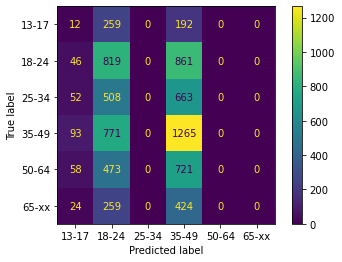

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

Se muestra  el modelo RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X, train_labels)
predicciones=clf.predict(test_X)
accuracy = accuracy_score(test_labels,predicciones)
print("Accuracy: ", accuracy*100)

Accuracy:  28.453333333333337


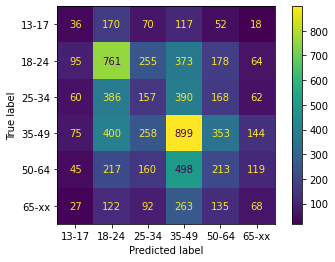

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,test_X, test_labels)
plt.show()

## Conclusiones

- Para el primer método de Diccionario de palabras, los clasificadores que mejor entregaron resultados son las máquinas de soporte vectorial que clasificaron aceptablemente los rangos de 18 a 24 años y 35 a 49 años.

- En el segundo método de caracteristicas propias del tweet se observó mas baja precisión de los resultados a comparación del primer método, sin embargo para este caso el mejor clasificador fue el de "RandomForest".

- Para lograr mejores resultados se podrían considerar métodos de bigramas y trigramas los cuales relacionan las palabras con sus vecinos y así lograr tener un contexto mas acertado del tweet.

- Con respecto a la Data suministrada la clasificación podría mejorar si dentro de esta se incluyen nombres y el arroba del usuario, así como personas que sigue cada cuenta y sus seguidores y la descripción de la cuenta.